__Ejercicio 2__. Utiliza tu función `derivadaNumerica` para
calcular la derivada de la función $\cos$ en un punto
$x_0\in[0,1)$. Compara tu resultado con el que indica el
cálculo exacto. Utiliza valores de $h$ cada vez más pequeños, grafica el comportamiento de la derivada y muestra como converge al valor exacto conforme tomamos $h$ cada vez más pequeño. Para ello pueden graficar el resultado de la derivada numérica contra $1/h$.
Observa el resultado de la aproximación y comenta. ¿El error es del orden de $h$?

In [164]:
function derivadaNumerica(f::Function,x,h) #Definimos la funcion que hara el calculo de la derivada númerica
    
    return (f(x+h)-f(x))/h
end

derivadaNumerica (generic function with 1 method)

In [165]:
derivadaNumerica(x->cos(x),1/2,0.1) # el valor aproximado es este

-0.5224694698069443

In [166]:
-sin(1/2) # este es el valor real ya que la derivada de cos(x) es -sin(x)

-0.479425538604203

In [167]:
function listah(h) # con esta funcion haremos una arreglo de h's las cuales utilizaremos para calcular la derivada
arreglo=[] 
    
    while h>0.01 # con este While haremos que h se haga cada vez más pequeña
        h-=0.1
        push!(arreglo,h) # llenamos el arreglo con las h 
    end
    return arreglo # pedimos que nos regrese el arreglo
end


listah (generic function with 2 methods)

In [168]:
listah(5) # probamos nuestra función y vemos que efectivamente funciona

50-element Array{Any,1}:
 4.9        
 4.8        
 4.7        
 4.6        
 4.5        
 4.4        
 4.3        
 4.2        
 4.1        
 4.0        
 3.9        
 3.8        
 3.7        
 ⋮          
 1.1        
 1.0        
 0.9        
 0.8        
 0.7        
 0.6        
 0.5        
 0.4        
 0.3        
 0.2        
 0.1        
 1.02696e-15

In [169]:
function hinversa(h)
listahin=[]
    while h>0.01
        h-=0.1
        push!(listahin,1/h)
    end
    return listahin
end

hinversa (generic function with 1 method)

In [170]:
hinversa(5)

50-element Array{Any,1}:
  0.204082  
  0.208333  
  0.212766  
  0.217391  
  0.222222  
  0.227273  
  0.232558  
  0.238095  
  0.243902  
  0.25      
  0.25641   
  0.263158  
  0.27027   
  ⋮         
  0.909091  
  1.0       
  1.11111   
  1.25      
  1.42857   
  1.66667   
  2.0       
  2.5       
  3.33333   
  5.0       
 10.0       
  9.73751e14

In [207]:
using SymPy
using PyPlot
function grafica(f::Function,x,h,exacta) # Con esta funcion graficaremos la derivada de cos mientras h se hace pequeña
array=listah(h) #le pasamos lo que hace nuestra función listah(x)
array2=[] # Definimos un arreglo vacio donde iremos guardando los valores de nuestra derivada mientras esta se aproxima a la solucion exacta.
Error=[]
array3=hinversa(h) # le pasamos la funcion que va invertir la h para graficarla 

    for i in 1:length(array) # Con este ciclo for obtendremos el valor de la derivada conforme h se hace más pequeña
         
        push!(array2,derivadaNumerica(f,x,array[i])) #llenamos el arreglo con los valores de la derivada, aqui utilizamos la funcion del ejercici 1
        #push!(array3, 1/h) # aqui 
        er=abs((derivadaNumerica(f,x,array[i])-exacta)/exacta)
        push!(Error,er)
        
        
    
    end
#print(Error)
#plot(array,Error)
#print(array2)
plot(array3,array2)
    
end
        
        



grafica (generic function with 2 methods)

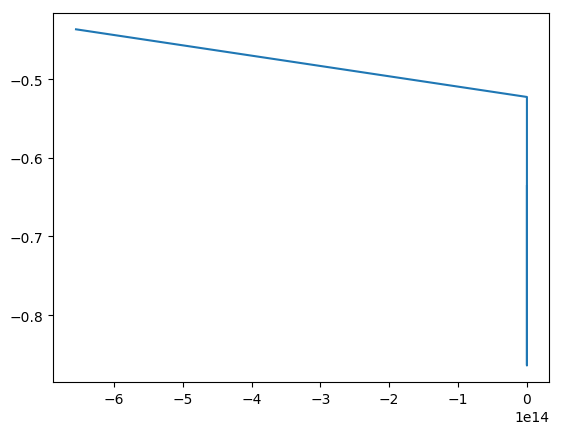

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5a40a05110>

In [208]:
grafica(x->cos.(x),1/2,3,-0.479425538604203)# No sé por qué la grafica queda así, hice muchas pruebas,y creo que el error esta al momento de inverti las h
#Se puede tambien observar que al imprimir el arreglo de las derivadas este si se aproxima a la h exacta

In [ ]:
function error_derivada(f,x,h,exacta)
 error=[]
 arreglo_=listah(h)  

    
    for i in 1:lenght(arreglo_)
        
        er=abs((derivadaNumerica(f,x,)-exacta)/exacta)
        p
    

__Ejercicio 3__. Teniendo en mente la serie de Taylor para $f(x+h)$ ¿existe
alguna forma de mejorar el cálculo de la derivada numérica? Comenta.

__Tip:__ ¿Que pasa con los términos pares de la serie cuando la calculamos para $f(x-h)$?, ¿Como podemos despejar la derivada exacta de $f$ combinando ambas series? 

__Nota:__ Entregar en $\LaTeX$ en el notebook de la tarea.

Desarrollando las series de Taylor de $f(x+h)$  y de $f(x-h)$ tenemos que


$$f(x+h)=f(x)+hf'(x)+\dfrac{h^{2}}{2}f''(x)+\dfrac{h^{3}}{6}f'''(x)+\mathcal{O}(h^{4})$$ 


$$f(x-h)=f(x)-hf'(x)+\dfrac{h^{2}}{2}f''(x)-\dfrac{h^{3}}{6}f'''(x)+\mathcal{O}(h^{4})$$ 


sumamos las dos expresiones anteriores 


$$f(x+h)-f(x-h)=2hf'(x)+\dfrac{h^{3}}{3}f'''(x)+\mathcal{O}(h^{5})=
2hf'(x)+\mathcal{O}(h^{3})$$

dividiendo entre $\space$  $2h$ $\space$ tenemos que

$$\frac{f(x+h)-f(x-h)}{2h}-f'(x)=\mathcal{O}(h^{2})$$ 

y llegamos hasta $$f'(x)\approx \frac{f(x+h) -f(x-h)}{2h}$$


__Ejercicio 4__. Implementa la _derivada
simétrica_ en `Julia` como `derivada_Simetrica` y repite la
comparativa que realizaste en el __ejercicio 2__.

In [209]:
function derivada_simetrica(f::Function,x,h)
    
    Devsim=(f(x+h)-f(x-h))/2h
    
    return Devsim 
    
end

derivada_simetrica (generic function with 1 method)

In [210]:
derivada_simetrica(x->cos(x),1/2,0.1)# esta se aproximara más rapido que la anterior

-0.4786268954660339

In [211]:
-sin(1/2)

-0.479425538604203

In [234]:
using SymPy
using PyPlot
function grafica(f::Function,x,h,exacta) # Con esta funcion graficaremos la derivada de cos mientras h se hace pequeña
arrayI=listah(h) #le pasamos lo que hace nuestra función listah(x)
arrayII=[] # Definimos un arreglo vacio donde iremos guardando los valores de nuestra derivada mientras esta se aproxima a la solucion exacta.
ErrorI=[]

arrayIII=hinversa(h) # le pasamos la funcion que va invertir la h para graficarla 

    for i in 1:length(arrayI) # Con este ciclo for obtendremos el valor de la derivada conforme h se hace más pequeña
         
        push!(arrayII,derivada_simetrica(f,x,arrayI[i])) #llenamos el arreglo con los valores de la derivada, aqui utilizamos la funcion del ejercici 1
        #push!(array3, 1/h) # aqui 
        er=abs((derivada_simetrica(f,x,arrayI[i])-exacta)/exacta)
        push!(ErrorI,er)
        
        
    
    end
#print(Error)
plot(arrayI,ErrorI)
#print(array2)
#plot(arrayIII,arrayII)

end
        

grafica (generic function with 2 methods)

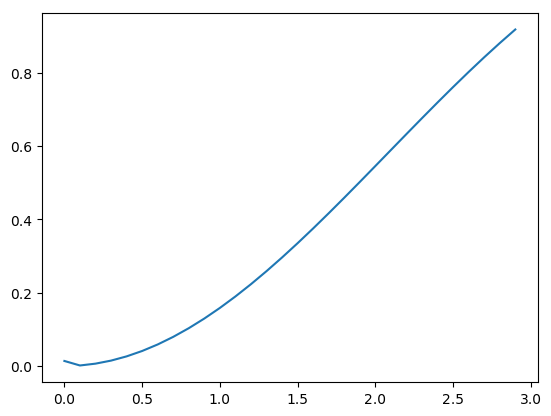

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5a42460ed0>

In [235]:
grafica(x->cos.(x),1/2,3,-0.479425538604203) #graficamos el error

__Ejercicio 5:__ Demuestre que $\Delta_h$ es un operador lineal y que podemos "factorizar" la función a la derecha del operador. Hecho esto podemos quitar de ambos lados la función $f$ para obtener lo siguiente:
$$\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$$

Para demostrar que $\Delta_h$ es una operador lineal debemos de ver que abra suma y saque escalares entonces:

Demostración: 

$$\Delta_{h}(\alpha f +g) = \sum\nolimits_{n=0}^\infty{n = 1}^{\infty} \frac{h^n}{n!} \frac{d^n(\alpha f +g)}{dx^n}$$

Usando la linealidad del operador derivada 

$$ = \sum\nolimits_{n = 1}^{\infty} \frac{h^n}{n!}\left[\alpha \frac{d^n f}{dx^2} +\frac{d^n g}{dx^2}\right]$$

distribuimos y tenemos que

$$= \sum\nolimits_{n = 1}^{\infty} \left[\alpha\frac{h^n}{n!}\frac{d^n f}{dx^2} + \frac{h^n}{n!} \frac{d^n g}{dx^2}\right]$$

Usando la linealidad del operador suma 

$$ = \alpha \sum\nolimits_{n = 1}^{\infty} \frac{h^n}{n!}\frac{d^n f}{dx^2} +\sum\nolimits_{n = 1}^{\infty} \frac{h^n}{n!}\frac{d^n g}{dx^2}$$

$$= \alpha \Delta_{h}(f) +\Delta_{h}(g)$$


__Ejercicio 6:__ Para saber como se relaciona el _operador derivada exacta_ con el _operador diferencia finita hacia adelante_ es necesario invertir la serie $\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$. Una forma directa de hacerlo es identificar la función para la cual es esa serie. Entonces, pensando en el operador derivada como un número, la serie se identifica como función evaluada en $\left. h\frac{d}{d_\xi}\right|_{\substack{ \xi=x }}$, ¿cual es esa función?. Si llamamos $\phi$ a dicha función, deberiamos de tener una relación de la siguiente forma:
$$\Delta_h=\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right)$$.
    
* __Nota:__ En la clase se demostró que $\phi(x)=e^x-1$, escriba el razonamiento en $\LaTeX$ de como se llegó a esto.

Comenzemos definiendo la serie de Taylor para la funcion exponencial 

$$e^x = \sum_{n = 0}^{\infty} \frac{x^n}{n!}$$

y entonces tenemos que 
$$\Delta_{h} = e^{h\frac{d}{dx}} -1$$



con lo que llegamos a 
$$\frac{1}{h}log(\Delta_{h} +1) = \frac{d}{dx}$$

y $$log(1+x)= 0+\left. \frac{1}{1+x}\right|_{x=0}x-\frac{x^2}{2}$$

por ultimo 
$$\frac{d}{dx} =\frac{1}{h}\left(\Delta_{h} -\frac{1}{2} \Delta_{h}^2+.....\right)$$ 
